<a href="https://colab.research.google.com/github/Walt1231/Recreate-Graph-Part-2/blob/main/Recreate_Graph_Part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
filename = '/content/mortgages.csv'
df = pd.read_csv(filename)
df.head(100)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
95,96,326497.84,1686.42,816.24,870.18,325627.66,30 Year,0.03
96,97,325627.66,1686.42,814.06,872.36,324755.30,30 Year,0.03
97,98,324755.30,1686.42,811.88,874.54,323880.76,30 Year,0.03
98,99,323880.76,1686.42,809.70,876.72,323004.04,30 Year,0.03


In [ ]:
df.shape

(1080, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
df.groupby(by = 'Mortgage Name')['Starting Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Mortgage Name,,,,,,,,
15 Year,360.0,220934.639278,115178.261320,2753.47,124670.5900,230792.285,322164.7250,400000.0
30 Year,720.0,239399.592569,114325.499522,1677.04,148596.9775,258487.890,340228.6625,400000.0


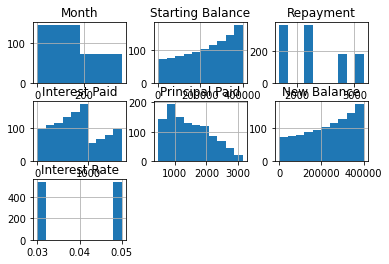

In [ ]:
df.hist();

In [ ]:
df.groupby(by = 'Mortgage Name')['Month'].unique()


Mortgage Name
15 Year    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
30 Year    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: Month, dtype: object

In [ ]:
df_Mor30_Int_3 = df[(df['Mortgage Name'] == '30 Year') &  (df['Interest Rate'] == 0.03)]
df_Mor30_Int_3

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


In [ ]:
df_Mor30_Int_5 = df[(df['Mortgage Name'] == '30 Year') &  (df['Interest Rate'] == 0.05)]
df_Mor30_Int_5

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


In [ ]:
x_5 = df_Mor30_Int_5['Month']
x_5

360      1
361      2
362      3
363      4
364      5
      ... 
715    356
716    357
717    358
718    359
719    360
Name: Month, Length: 360, dtype: int64

In [ ]:
x_3 = df_Mor30_Int_3['Month']
x_3

0        1
1        2
2        3
3        4
4        5
      ... 
355    356
356    357
357    358
358    359
359    360
Name: Month, Length: 360, dtype: int64

In [ ]:
y_3 = df_Mor30_Int_3['Interest Paid'].cumsum()
y_3

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

In [ ]:
y_5 = df_Mor30_Int_5['Interest Paid'].cumsum()
y_5

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

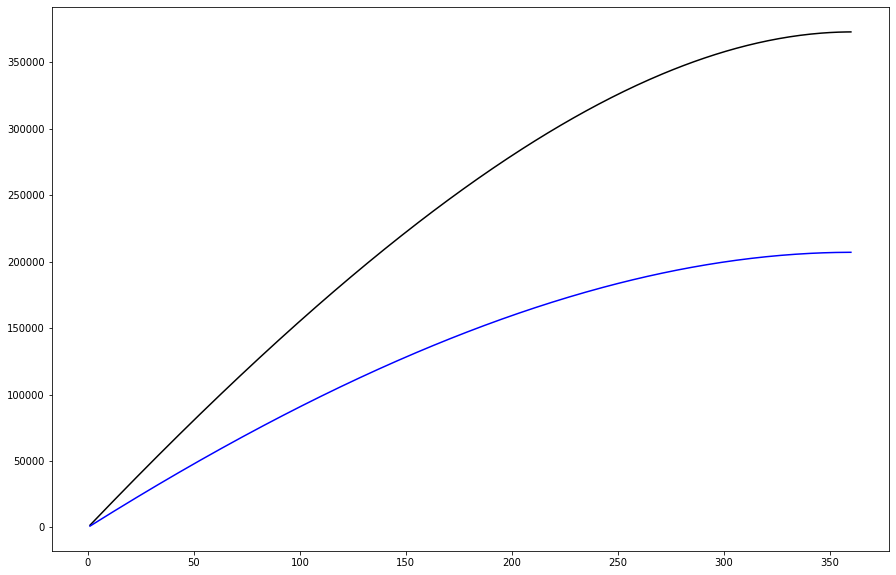

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(x_5,y_5,c='k')
plt.plot(x_3,y_3,c='b')
plt.show()

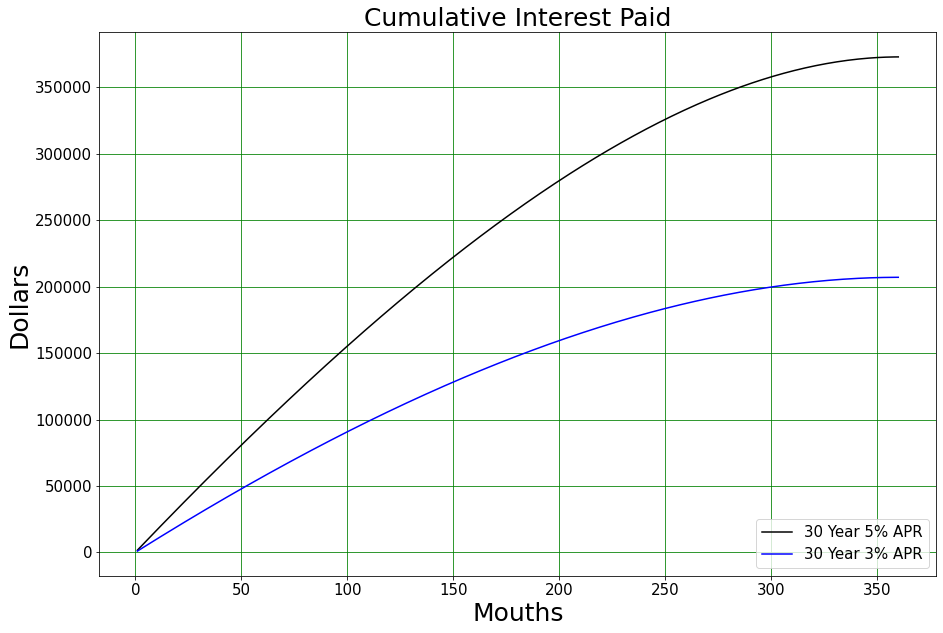

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(x_5,y_5,c='k',label = '30 Year 5% APR')
plt.plot(x_3,y_3,c='b',label = '30 Year 3% APR')
plt.legend(loc='lower right',fontsize=15)
plt.xlabel('Mouths', fontsize=25)
plt.ylabel('Dollars',fontsize=25)
plt.title('Cumulative Interest Paid',fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(c = 'g')
plt.show()